### Importing necessary libraries

In [6]:
# pandas
import pandas as pd

# numpy, matplotlib, seaborn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
import statsmodels.api as sm

# GridSearchCV to find optimal min_samples_split
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
from sklearn.feature_selection import RFE

# Importing train-test-split 
from sklearn.model_selection import train_test_split

# Evaluation metrics
from sklearn.metrics import *

# Ignoring warning
import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")

### Importing the data

In [7]:
employee = pd.read_csv('employee.csv',index_col=0)
employee.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won,avg_training_score,is_promoted
employee_id,,,,,,,,,,,,,
65438,SalesMarketing,region_7,Masters,f,sourcing,1,35,5,8,1,0,49,0
65141,Operations,region_22,Bachelors,m,other,1,30,5,4,0,0,60,0
7513,SalesMarketing,region_19,Bachelors,m,sourcing,1,34,3,7,0,0,50,0
2542,SalesMarketing,region_23,Bachelors,m,other,2,39,1,10,0,0,50,0
48945,Technology,region_26,Bachelors,m,other,1,45,3,2,0,0,73,0


In [8]:
employee.nunique()

department               9
region                  34
education                4
gender                   2
recruitment_channel      3
no_of_trainings         10
age                     41
previous_year_rating     6
length_of_service       35
KPIs_met >80%            2
awards_won               2
avg_training_score      61
is_promoted              2
dtype: int64

In [9]:
employee.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54808 entries, 65438 to 51526
Data columns (total 13 columns):
department              54808 non-null object
region                  54808 non-null object
education               54808 non-null object
gender                  54808 non-null object
recruitment_channel     54808 non-null object
no_of_trainings         54808 non-null int64
age                     54808 non-null int64
previous_year_rating    54808 non-null int64
length_of_service       54808 non-null int64
KPIs_met >80%           54808 non-null int64
awards_won              54808 non-null int64
avg_training_score      54808 non-null int64
is_promoted             54808 non-null int64
dtypes: int64(8), object(5)
memory usage: 5.9+ MB


The columns like `no_of_trainings, previous_year_rating , KPIs_met >80% , awards_won` are actualy categorical but given in the interger format ,so these columns need to be converted as objects.

### Converting numerical data into categorical

In [10]:
list_int_obj = ['no_of_trainings','previous_year_rating','KPIs_met >80%','awards_won']
for col in list_int_obj:
    employee[col] = employee[col].apply(lambda x: str(x))

In [11]:
employee.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54808 entries, 65438 to 51526
Data columns (total 13 columns):
department              54808 non-null object
region                  54808 non-null object
education               54808 non-null object
gender                  54808 non-null object
recruitment_channel     54808 non-null object
no_of_trainings         54808 non-null object
age                     54808 non-null int64
previous_year_rating    54808 non-null object
length_of_service       54808 non-null int64
KPIs_met >80%           54808 non-null object
awards_won              54808 non-null object
avg_training_score      54808 non-null int64
is_promoted             54808 non-null int64
dtypes: int64(4), object(9)
memory usage: 5.9+ MB


### Onehot encoding for categorical variables

In [12]:
data = pd.get_dummies(employee,drop_first=True)
data.shape

(54808, 67)

In [13]:
data.head()

,age,length_of_service,avg_training_score,is_promoted,department_Finance,department_HR,department_Legal,department_Operations,department_Procurement,department_RandD,...,no_of_trainings_7,no_of_trainings_8,no_of_trainings_9,previous_year_rating_1,previous_year_rating_2,previous_year_rating_3,previous_year_rating_4,previous_year_rating_5,KPIs_met >80%_1,awards_won_1
employee_id,,,,,,,,,,,,,,,,,,,,,
65438,35,8,49,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
65141,30,4,60,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
7513,34,7,50,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2542,39,10,50,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
48945,45,2,73,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


### Standardizing the data

In [14]:
df = data[['age','length_of_service','avg_training_score']]
transformed_data = (df-df.mean())/df.std()
data = data.drop(['age','length_of_service','avg_training_score'],1)
data = pd.concat([data,transformed_data],axis=1)

In [15]:
data.head()

,is_promoted,department_Finance,department_HR,department_Legal,department_Operations,department_Procurement,department_RandD,department_SalesMarketing,department_Technology,region_region_10,...,previous_year_rating_1,previous_year_rating_2,previous_year_rating_3,previous_year_rating_4,previous_year_rating_5,KPIs_met >80%_1,awards_won_1,age,length_of_service,avg_training_score
employee_id,,,,,,,,,,,,,,,,,,,,,
65438,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,1,0,0.025598,0.500455,-1.075922
65141,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,-0.627129,-0.437391,-0.253280
7513,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,-0.104947,0.265994,-1.001136
2542,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0.547780,0.969378,-1.001136
48945,0,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,1.331052,-0.906313,0.718933


### Separating X-variables and Y-variable

In [16]:
x_data = data.drop('is_promoted',1)
y_data = data['is_promoted']

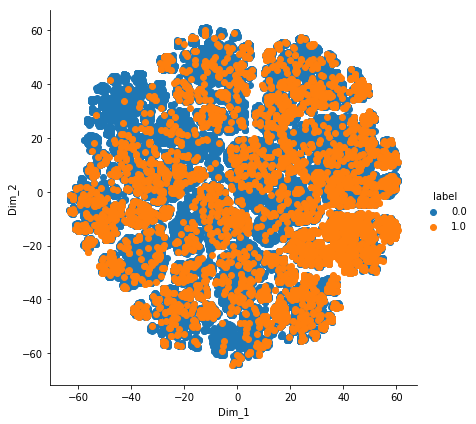

In [12]:
from sklearn.manifold import TSNE

data_sne = x_data
labels_sne = y_data

sne = TSNE(n_components=2, random_state=0)

tsne_data = sne.fit_transform(data_sne)

tsne_data = np.vstack((tsne_data.T, labels_sne)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

sns.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.show()

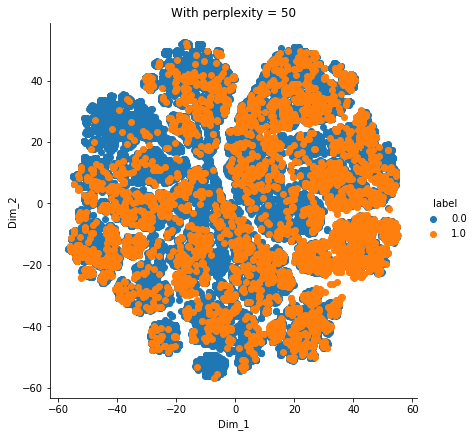

In [13]:
sne = TSNE(n_components=2, random_state=0, perplexity=50)

tsne_data = sne.fit_transform(data_sne)

tsne_data = np.vstack((tsne_data.T, labels_sne)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

sns.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.title('With perplexity = 50')
plt.show()

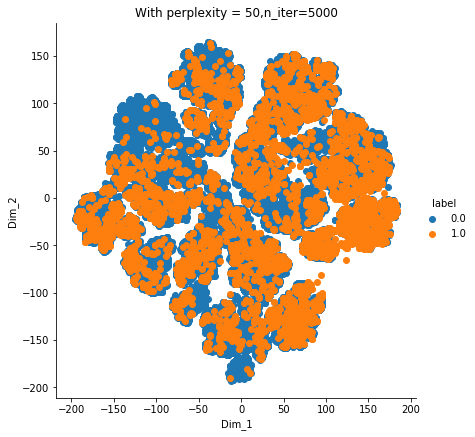

In [14]:
sne = TSNE(n_components=2, random_state=0, perplexity=50, n_iter=5000)

tsne_data = sne.fit_transform(data_sne)

tsne_data = np.vstack((tsne_data.T, labels_sne)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

sns.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.title('With perplexity = 50,n_iter=5000')
plt.show()

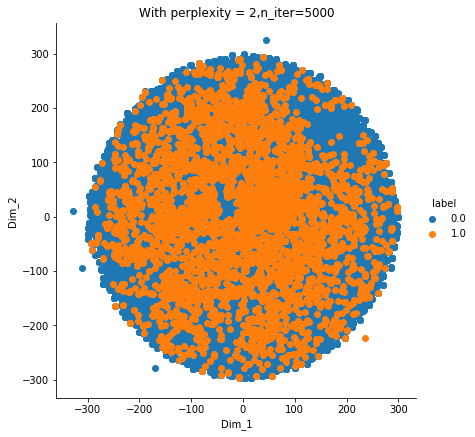

In [15]:
sne = TSNE(n_components=2, random_state=0, perplexity=2, n_iter=5000)

tsne_data = sne.fit_transform(data_sne)

tsne_data = np.vstack((tsne_data.T, labels_sne)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

sns.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.title('With perplexity = 2,n_iter=5000')
plt.show()

### Building base models

In [167]:
def model(clf,X_train,Y_train):
    x_train, x_test, y_train, y_test = train_test_split(X_train, Y_train, test_size=0.20, stratify = Y_train, random_state = 99)
    clf.fit(x_train,y_train)
    y_pred = clf.predict(x_test)
    print('Scores of the Model')
    print('Confusion Matrix of the model:')
    print(confusion_matrix(y_test,y_pred))
    print('-----------------------------------------')
    print('Accuracy Score:',accuracy_score(y_test,y_pred))
    print('-----------------------------------------')
    print('Classification report:')
    print(classification_report(y_test, y_pred))
    print('------------------------------------------')
    print('f1 score:',f1_score(y_test,y_pred))
    print('------------------------------------------')
    print('ROC AUC score:',roc_auc_score(y_test,y_pred))
    print('------------------------------------------')
    print('')
    print('Cross Validation using KFold:')
    kf = KFold(n_splits=5,random_state=99)
    print('Accuracy score using KFold cross validation:')
    score = cross_val_score(clf, x_train, y_train, cv=kf,scoring='f1', n_jobs=1)
    for i in score:
        print('cross_val_score:',i)
    print('Mean Acuuracy Score:',score.mean())

In [18]:
def r2(model):
    return 1-(model.deviance/model.null_deviance)

### Base model using Logistic Regression

In [19]:
model(LogisticRegression(),x_data,y_data)

Scores of the Model
Confusion Matrix of the model:
[[9977   51]
 [ 712  222]]
-----------------------------------------
Accuracy Score: 0.9303959131545338
-----------------------------------------
Classification report:
              precision    recall  f1-score   support

           0       0.93      0.99      0.96     10028
           1       0.81      0.24      0.37       934

   micro avg       0.93      0.93      0.93     10962
   macro avg       0.87      0.62      0.67     10962
weighted avg       0.92      0.93      0.91     10962

------------------------------------------
f1 score: 0.36785418392709196
------------------------------------------
ROC AUC score: 0.6163008031473332
------------------------------------------

Cross Validation using KFold:
Accuracy score using KFold cross validation:
cross_val_score: 0.3829113924050633
cross_val_score: 0.37795275590551186
cross_val_score: 0.37437603993344426
cross_val_score: 0.380178716490658
cross_val_score: 0.3648315529991783
Mea

In [20]:
tuned_parameters = [{'C': [10**-4, 10**-2, 10**0, 10**2, 10**4,10**6]}]

model_lr = GridSearchCV(LogisticRegression(), tuned_parameters, scoring = 'f1', cv=5)
model_lr.fit(x_data, y_data)

print(model_lr.best_estimator_)
print(model_lr.score(x_data, y_data))

LogisticRegression(C=10000, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)
0.4072066326530612


In [21]:
lr= LogisticRegression(C=10000, penalty='l2')
model(lr,x_data,y_data)

Scores of the Model
Confusion Matrix of the model:
[[9958   70]
 [ 689  245]]
-----------------------------------------
Accuracy Score: 0.9307608100711549
-----------------------------------------
Classification report:
              precision    recall  f1-score   support

           0       0.94      0.99      0.96     10028
           1       0.78      0.26      0.39       934

   micro avg       0.93      0.93      0.93     10962
   macro avg       0.86      0.63      0.68     10962
weighted avg       0.92      0.93      0.91     10962

------------------------------------------
f1 score: 0.3923138510808647
------------------------------------------
ROC AUC score: 0.6276660895531058
------------------------------------------

Cross Validation using KFold:
Accuracy score using KFold cross validation:
cross_val_score: 0.40853658536585363
cross_val_score: 0.4003392705682782
cross_val_score: 0.40927258193445243
cross_val_score: 0.41809672386895474
cross_val_score: 0.39171974522292996
M

### Base model using decision tree

In [22]:
model(DecisionTreeClassifier(),x_data,y_data)

Scores of the Model
Confusion Matrix of the model:
[[9373  655]
 [ 504  430]]
-----------------------------------------
Accuracy Score: 0.8942711184090495
-----------------------------------------
Classification report:
              precision    recall  f1-score   support

           0       0.95      0.93      0.94     10028
           1       0.40      0.46      0.43       934

   micro avg       0.89      0.89      0.89     10962
   macro avg       0.67      0.70      0.68     10962
weighted avg       0.90      0.89      0.90     10962

------------------------------------------
f1 score: 0.4259534422981674
------------------------------------------
ROC AUC score: 0.697534163443002
------------------------------------------

Cross Validation using KFold:
Accuracy score using KFold cross validation:
cross_val_score: 0.4444444444444445
cross_val_score: 0.42320085929108486
cross_val_score: 0.429384376616658
cross_val_score: 0.45037037037037037
cross_val_score: 0.41608040201005025
Mean

### Base model using Random Forest

In [23]:
model(RandomForestClassifier(),x_data,y_data)

Scores of the Model
Confusion Matrix of the model:
[[9934   94]
 [ 691  243]]
-----------------------------------------
Accuracy Score: 0.928388980113118
-----------------------------------------
Classification report:
              precision    recall  f1-score   support

           0       0.93      0.99      0.96     10028
           1       0.72      0.26      0.38       934

   micro avg       0.93      0.93      0.93     10962
   macro avg       0.83      0.63      0.67     10962
weighted avg       0.92      0.93      0.91     10962

------------------------------------------
f1 score: 0.3823760818253344
------------------------------------------
ROC AUC score: 0.6253987763598113
------------------------------------------

Cross Validation using KFold:
Accuracy score using KFold cross validation:
cross_val_score: 0.4406528189910979
cross_val_score: 0.3576956147893379
cross_val_score: 0.43491816056118476
cross_val_score: 0.40863531225905936
cross_val_score: 0.41252864782276544
Mea

### Logistic regression model

In [24]:
data.columns

Index(['is_promoted', 'department_Finance', 'department_HR',
       'department_Legal', 'department_Operations', 'department_Procurement',
       'department_RandD', 'department_SalesMarketing',
       'department_Technology', 'region_region_10', 'region_region_11',
       'region_region_12', 'region_region_13', 'region_region_14',
       'region_region_15', 'region_region_16', 'region_region_17',
       'region_region_18', 'region_region_19', 'region_region_2',
       'region_region_20', 'region_region_21', 'region_region_22',
       'region_region_23', 'region_region_24', 'region_region_25',
       'region_region_26', 'region_region_27', 'region_region_28',
       'region_region_29', 'region_region_3', 'region_region_30',
       'region_region_31', 'region_region_32', 'region_region_33',
       'region_region_34', 'region_region_4', 'region_region_5',
       'region_region_6', 'region_region_7', 'region_region_8',
       'region_region_9', 'education_BelowSecondary', 'education_Maste

In [25]:
logm1 = sm.GLM(y_data,(sm.add_constant(x_data)), family = sm.families.Binomial())
model1 = logm1.fit()

In [26]:
r2(model1)

0.33111376922178914

In [27]:
model1.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                           Results: Generalized linear model
=======================================================================================
Model:                      GLM                     AIC:                   21486.3099  
Link Function:              logit                   BIC:                   -575959.1175
Dependent Variable:         is_promoted             Log-Likelihood:        -10676.     
Date:                       2019-04-19 11:47        LL-Null:               -15961.     
No. Observations:           54808                   Deviance:              21352.      
Df Model:                   66                      Pearson chi2:          4.40e+04    
Df Residuals:               54741                   Scale:                 1.0000      
Method:                     IRLS                                                       
---------------------------------------------------------------------------------------
                              Coef.    Std.Err.     z     P>|z|     [0.025     0.975]  
---------------------------------------------------------------------------------------
const                        -10.4052     0.2344 -44.3970 0.0000    -10.8646    -9.9459
department_Finance             7.0614     0.1604  44.0367 0.0000      6.7471     7.3757
department_HR                  9.9529     0.2117  47.0164 0.0000      9.5380    10.3678
department_Legal               6.8573     0.2126  32.2473 0.0000      6.4405     7.2740
department_Operations          7.2777     0.1417  51.3680 0.0000      7.0000     7.5553
department_Procurement         4.4102     0.1058  41.6783 0.0000      4.2028     4.6176
department_RandD              -0.5515     0.1478  -3.7325 0.0002     -0.8411    -0.2619
department_SalesMarketing     10.4652     0.1883  55.5865 0.0000     10.0962    10.8342
department_Technology          1.7745     0.0766  23.1719 0.0000      1.6244     1.9246
region_region_10               0.1519     0.2388   0.6362 0.5247     -0.3161     0.6200
region_region_11              -0.3142     0.2168  -1.4490 0.1473     -0.7392     0.1108
region_region_12              -0.4122     0.2888  -1.4274 0.1535     -0.9782     0.1538
region_region_13               0.0583     0.1872   0.3116 0.7553     -0.3086     0.4253
region_region_14               0.0209     0.2248   0.0928 0.9260     -0.4197     0.4615
region_region_15               0.0851     0.1875   0.4537 0.6501     -0.2825     0.4527
region_region_16              -0.1001     0.2073  -0.4827 0.6293     -0.5065     0.3063
region_region_17               0.5297     0.2114   2.5055 0.0122      0.1153     0.9441
region_region_18               0.2885     1.0598   0.2723 0.7854     -1.7886     2.3656
region_region_19              -0.0378     0.2336  -0.1616 0.8716     -0.4955     0.4200
region_region_2                0.1718     0.1737   0.9888 0.3228     -0.1687     0.5122
region_region_20              -0.3751     0.2418  -1.5514 0.1208     -0.8490     0.0988
region_region_21              -0.3841     0.3127  -1.2281 0.2194     -0.9970     0.2289
region_region_22               0.4771     0.1743   2.7374 0.0062      0.1355     0.8187
region_region_23               0.4496     0.1997   2.2509 0.0244      0.0581     0.8410
region_region_24              -0.3265     0.3088  -1.0573 0.2904     -0.9319     0.2788
region_region_25               0.5253     0.2086   2.5178 0.0118      0.1164     0.9342
region_region_26              -0.1089     0.1947  -0.5592 0.5760     -0.4904     0.2727
region_region_27               0.1033     0.1994   0.5178 0.6046     -0.2876     0.4941
region_region_28               0.3700     0.1967   1.8815 0.0599     -0.0154     0.7555
region_region_29              -0.4746     0.2409  -1.9700 0.0488     -0.9467    -0.0024
region_region_3                0.2860     0.2733   1.0465 0.2953     -0.2497     0.8217
region_region_30               0.1512     0.2395   0.6311 0.5280     -0.3183     0.6206
region_region_31  

Removing the variables that are less significant (i.e p value>0.05)

In [28]:
x_data2 = x_data.drop(['region_region_10','region_region_11','region_region_12','region_region_13',
                      'region_region_14','region_region_15','region_region_16','region_region_21',
                      'region_region_18','region_region_19','region_region_20','region_region_2',
                      'region_region_24','region_region_26','region_region_27','region_region_3',
                      'region_region_30','region_region_31','region_region_33','region_region_5',
                       'region_region_6','region_region_8','education_BelowSecondary','gender_m',
                      'recruitment_channel_sourcing','no_of_trainings_10','no_of_trainings_5',
                      'no_of_trainings_6','no_of_trainings_7','no_of_trainings_8','no_of_trainings_9',
                      'previous_year_rating_3'],1)

In [29]:
logm2 = sm.GLM(y_data,(sm.add_constant(x_data2)), family = sm.families.Binomial())
model2 = logm2.fit()

In [30]:
r2(model2)

0.32917418210354643

In [31]:
model2.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                       Results: Generalized linear model
================================================================================
Model:                   GLM                   AIC:                 21484.2258  
Link Function:           logit                 BIC:                 -576246.3726
Dependent Variable:      is_promoted           Log-Likelihood:      -10707.     
Date:                    2019-04-19 11:47      LL-Null:             -15961.     
No. Observations:        54808                 Deviance:            21414.      
Df Model:                34                    Pearson chi2:        4.39e+04    
Df Residuals:            54773                 Scale:               1.0000      
Method:                  IRLS                                                   
--------------------------------------------------------------------------------
                              Coef.   Std.Err.    z     P>|z|   [0.025   0.975] 
--------------------------------------------------------------------------------
const                        -10.3998   0.1451 -71.6504 0.0000 -10.6843 -10.1153
department_Finance             7.1026   0.1598  44.4489 0.0000   6.7894   7.4158
department_HR                  9.9932   0.2107  47.4235 0.0000   9.5801  10.4062
department_Legal               6.8917   0.2118  32.5459 0.0000   6.4766   7.3067
department_Operations          7.2777   0.1406  51.7480 0.0000   7.0020   7.5533
department_Procurement         4.4225   0.1044  42.3611 0.0000   4.2179   4.6271
department_RandD              -0.5375   0.1475  -3.6430 0.0003  -0.8266  -0.2483
department_SalesMarketing     10.4955   0.1879  55.8661 0.0000  10.1273  10.8637
department_Technology          1.7638   0.0751  23.4771 0.0000   1.6166   1.9110
region_region_17               0.5223   0.1304   4.0046 0.0001   0.2667   0.7779
region_region_22               0.4693   0.0542   8.6632 0.0000   0.3631   0.5754
region_region_23               0.4483   0.1128   3.9758 0.0001   0.2273   0.6693
region_region_25               0.5344   0.1296   4.1236 0.0000   0.2804   0.7885
region_region_28               0.3711   0.1092   3.3966 0.0007   0.1569   0.5852
region_region_29              -0.4587   0.1756  -2.6127 0.0090  -0.8028  -0.1146
region_region_32              -0.4882   0.1868  -2.6141 0.0089  -0.8542  -0.1222
region_region_34              -0.9413   0.4272  -2.2035 0.0276  -1.7785  -0.1040
region_region_4                0.6480   0.0872   7.4342 0.0000   0.4771   0.8188
region_region_7                0.3913   0.0613   6.3843 0.0000   0.2712   0.5115
region_region_9               -1.1324   0.3981  -2.8445 0.0044  -1.9127  -0.3522
education_Masters              0.1752   0.0446   3.9271 0.0001   0.0878   0.2627
education_NotSpecified        -0.3980   0.1139  -3.4932 0.0005  -0.6213  -0.1747
recruitment_channel_referred  -0.1210   0.1109  -1.0912 0.2752  -0.3384   0.0963
no_of_trainings_2             -0.1515   0.0544  -2.7839 0.0054  -0.2582  -0.0448
no_of_trainings_3             -0.2234   0.1142  -1.9561 0.0505  -0.4473   0.0004
no_of_trainings_4             -0.4211   0.2388  -1.7633 0.0779  -0.8893   0.0470
previous_year_rating_1        -1.4423   0.1247 -11.5687 0.0000  -1.6866  -1.1979
previous_year_rating_2        -0.3747   0.0910  -4.1160 0.0000  -0.5531  -0.1963
previous_year_rating_4        -0.2938   0.0544  -5.3962 0.0000  -0.4005  -0.1871
previous_year_rating_5         0.3172   0.0436   7.2682 0.0000   0.2316   0.4027
KPIs_met >80%_1                1.8862   0.0444  42.4910 0.0000   1.7992   1.9732
awards_won_1                   1.5008   0.0797  18.8222 0.0000   1.3445   1.6571
age                           -0.2038   0.0277  -7.3643 0.0000  -0.2580  -0.1495
length_of_service              0.1353   0.0256   5.2945 0.0000   0.0852   0.1855
avg_training_score             4.1054   0.0686  59.8491 0.0000   3.9709   4.2398
================================================================================

"""

In [32]:
x_data2 = x_data2.drop(['no_of_trainings_3','no_of_trainings_4','recruitment_channel_referred'],1)

In [33]:
logm3 = sm.GLM(y_data,(sm.add_constant(x_data2)), family = sm.families.Binomial())
model3 = logm3.fit()

In [34]:
r2(model3)

0.32891386568423187

In [35]:
model3.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                      Results: Generalized linear model
=============================================================================
Model:                  GLM                  AIC:                21486.5357  
Link Function:          logit                BIC:                -576270.7975
Dependent Variable:     is_promoted          Log-Likelihood:     -10711.     
Date:                   2019-04-19 11:48     LL-Null:            -15961.     
No. Observations:       54808                Deviance:           21423.      
Df Model:               31                   Pearson chi2:       4.37e+04    
Df Residuals:           54776                Scale:              1.0000      
Method:                 IRLS                                                 
-----------------------------------------------------------------------------
                           Coef.   Std.Err.    z     P>|z|   [0.025   0.975] 
-----------------------------------------------------------------------------
const                     -10.4167   0.1450 -71.8401 0.0000 -10.7009 -10.1325
department_Finance          7.1047   0.1598  44.4727 0.0000   6.7916   7.4178
department_HR              10.0017   0.2105  47.5131 0.0000   9.5891  10.4143
department_Legal            6.9002   0.2117  32.5932 0.0000   6.4853   7.3152
department_Operations       7.2822   0.1405  51.8154 0.0000   7.0068   7.5577
department_Procurement      4.4219   0.1044  42.3759 0.0000   4.2174   4.6265
department_RandD           -0.5427   0.1476  -3.6764 0.0002  -0.8321  -0.2534
department_SalesMarketing  10.4972   0.1877  55.9111 0.0000  10.1292  10.8652
department_Technology       1.7585   0.0749  23.4718 0.0000   1.6117   1.9054
region_region_17            0.5305   0.1304   4.0690 0.0000   0.2750   0.7860
region_region_22            0.4527   0.0537   8.4240 0.0000   0.3473   0.5580
region_region_23            0.4494   0.1127   3.9859 0.0001   0.2284   0.6704
region_region_25            0.5382   0.1296   4.1530 0.0000   0.2842   0.7922
region_region_28            0.3722   0.1092   3.4094 0.0007   0.1582   0.5862
region_region_29           -0.4496   0.1755  -2.5621 0.0104  -0.7935  -0.1057
region_region_32           -0.4933   0.1870  -2.6382 0.0083  -0.8598  -0.1268
region_region_34           -0.9401   0.4272  -2.2005 0.0278  -1.7775  -0.1028
region_region_4             0.6516   0.0871   7.4785 0.0000   0.4808   0.8223
region_region_7             0.3925   0.0613   6.4064 0.0000   0.2725   0.5126
region_region_9            -1.1318   0.3980  -2.8435 0.0045  -1.9119  -0.3517
education_Masters           0.1787   0.0446   4.0075 0.0001   0.0913   0.2661
education_NotSpecified     -0.3859   0.1138  -3.3925 0.0007  -0.6089  -0.1630
no_of_trainings_2          -0.1381   0.0542  -2.5477 0.0108  -0.2443  -0.0319
previous_year_rating_1     -1.4424   0.1247 -11.5708 0.0000  -1.6867  -1.1981
previous_year_rating_2     -0.3704   0.0910  -4.0697 0.0000  -0.5487  -0.1920
previous_year_rating_4     -0.2897   0.0544  -5.3240 0.0000  -0.3963  -0.1830
previous_year_rating_5      0.3194   0.0436   7.3272 0.0000   0.2339   0.4048
KPIs_met >80%_1             1.8870   0.0444  42.5238 0.0000   1.8000   1.9740
awards_won_1                1.5023   0.0797  18.8431 0.0000   1.3461   1.6586
age                        -0.2011   0.0277  -7.2732 0.0000  -0.2553  -0.1469
length_of_service           0.1353   0.0256   5.2924 0.0000   0.0852   0.1854
avg_training_score          4.1046   0.0686  59.8610 0.0000   3.9702   4.2390
=============================================================================

"""

### Feature Selection Using RFE

In [36]:
logreg = LogisticRegression()
rfe = RFE(logreg, 15)             # running RFE with 20 variables as output
rfe = rfe.fit(x_data2,y_data)
print(rfe.support_)           # Printing the boolean results
print(rfe.ranking_)           # Printing the ranking

[ True  True  True  True  True False  True  True False False False False
 False  True  True  True False False  True False False False  True False
 False False  True  True False False  True]
[ 1  1  1  1  1  2  1  1  6  8  7  5  9  1  1  1  3 10  1 15 11 14  1 12
 13  4  1  1 16 17  1]


In [37]:
x_data2.columns

Index(['department_Finance', 'department_HR', 'department_Legal',
       'department_Operations', 'department_Procurement', 'department_RandD',
       'department_SalesMarketing', 'department_Technology',
       'region_region_17', 'region_region_22', 'region_region_23',
       'region_region_25', 'region_region_28', 'region_region_29',
       'region_region_32', 'region_region_34', 'region_region_4',
       'region_region_7', 'region_region_9', 'education_Masters',
       'education_NotSpecified', 'no_of_trainings_2', 'previous_year_rating_1',
       'previous_year_rating_2', 'previous_year_rating_4',
       'previous_year_rating_5', 'KPIs_met >80%_1', 'awards_won_1', 'age',
       'length_of_service', 'avg_training_score'],
      dtype='object')

In [38]:
x_data3 = x_data2[['department_Finance', 'department_HR', 'department_Legal',
       'department_Operations', 'department_Procurement','department_SalesMarketing', 'department_Technology',
                  'region_region_29','region_region_32', 'region_region_34','region_region_9',
                  'previous_year_rating_1','KPIs_met >80%_1', 'awards_won_1','avg_training_score']]

In [39]:
logm4 = sm.GLM(y_data,(sm.add_constant(x_data3)), family = sm.families.Binomial())
model4 = logm4.fit()

In [40]:
r2(model4)

0.3153424792581139

In [41]:
model4.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                      Results: Generalized linear model
=============================================================================
Model:                  GLM                  AIC:                21887.7640  
Link Function:          logit                BIC:                -576012.1546
Dependent Variable:     is_promoted          Log-Likelihood:     -10928.     
Date:                   2019-04-19 11:48     LL-Null:            -15961.     
No. Observations:       54808                Deviance:           21856.      
Df Model:               15                   Pearson chi2:       4.52e+04    
Df Residuals:           54792                Scale:              1.0000      
Method:                 IRLS                                                 
-----------------------------------------------------------------------------
                           Coef.   Std.Err.    z     P>|z|   [0.025   0.975] 
-----------------------------------------------------------------------------
const                     -10.3224   0.1392 -74.1444 0.0000 -10.5953 -10.0496
department_Finance          7.2525   0.1574  46.0767 0.0000   6.9440   7.5610
department_HR              10.1901   0.2077  49.0665 0.0000   9.7830  10.5971
department_Legal            7.0167   0.2091  33.5593 0.0000   6.6069   7.4265
department_Operations       7.3935   0.1375  53.7740 0.0000   7.1240   7.6630
department_Procurement      4.4651   0.1001  44.6063 0.0000   4.2689   4.6613
department_SalesMarketing  10.6130   0.1853  57.2623 0.0000  10.2498  10.9763
department_Technology       1.7225   0.0703  24.4993 0.0000   1.5847   1.8603
region_region_29           -0.6367   0.1744  -3.6504 0.0003  -0.9786  -0.2949
region_region_32           -0.6639   0.1854  -3.5807 0.0003  -1.0272  -0.3005
region_region_34           -1.0677   0.4238  -2.5192 0.0118  -1.8985  -0.2370
region_region_9            -1.2893   0.3953  -3.2619 0.0011  -2.0639  -0.5146
previous_year_rating_1     -1.4823   0.1224 -12.1083 0.0000  -1.7223  -1.2424
KPIs_met >80%_1             1.9737   0.0422  46.7559 0.0000   1.8910   2.0565
awards_won_1                1.4230   0.0782  18.2034 0.0000   1.2698   1.5762
avg_training_score          4.1588   0.0681  61.0887 0.0000   4.0254   4.2923
=============================================================================

"""

In [42]:
# UDF for calculating vif value
def vif_cal(input_data, dependent_col):
    vif_df = pd.DataFrame( columns = ['Var', 'Vif'])
    x_vars=input_data
    xvar_names=x_vars.columns
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]] 
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=sm.OLS(y,x).fit().rsquared  
        vif=round(1/(1-rsq),2)
        vif_df.loc[i] = [xvar_names[i], vif]
    return vif_df.sort_values(by = 'Vif', axis=0, ascending=False, inplace=False)

In [43]:
vif_cal(x_data3,y_data)

,Var,Vif
14,avg_training_score,2.68
10,region_region_9,0.40
7,region_region_29,0.23
13,awards_won_1,0.20
8,region_region_32,0.19
9,region_region_34,0.12
0,department_Finance,0.10
1,department_HR,0.06
6,department_Technology,0.05
4,department_Procurement,0.04


- Variance influence factor is less for all variables.

### Building the final model

#### Splitting the data for validation

In [44]:
x_train, x_test, y_train, y_test = train_test_split(x_data3, y_data, test_size=0.20, stratify = y_data, random_state = 99)

In [45]:
log_final = LogisticRegression()
log_final.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

### Making Predictions

In [46]:
y_pred = log_final.predict(x_test)

In [47]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96     10028
           1       0.85      0.22      0.35       934

   micro avg       0.93      0.93      0.93     10962
   macro avg       0.89      0.61      0.66     10962
weighted avg       0.92      0.93      0.91     10962



In [48]:
accuracy_score(y_test,y_pred)

0.930122240467068

In [49]:
confusion_matrix(y_test,y_pred)

array([[9992,   36],
       [ 730,  204]], dtype=int64)

In [50]:
model(LogisticRegression(),x_data3,y_data)

Scores of the Model
Confusion Matrix of the model:
[[9992   36]
 [ 730  204]]
-----------------------------------------
Accuracy Score: 0.930122240467068
-----------------------------------------
Classification report:
              precision    recall  f1-score   support

           0       0.93      1.00      0.96     10028
           1       0.85      0.22      0.35       934

   micro avg       0.93      0.93      0.93     10962
   macro avg       0.89      0.61      0.66     10962
weighted avg       0.92      0.93      0.91     10962

------------------------------------------
f1 score: 0.34752981260647364
------------------------------------------
ROC AUC score: 0.6074127347068466
------------------------------------------

Cross Validation using KFold:
Accuracy score using KFold cross validation:
cross_val_score: 0.3539967373572594
cross_val_score: 0.3616438356164383
cross_val_score: 0.3557446808510638
cross_val_score: 0.3667763157894737
cross_val_score: 0.3548117154811715
Mean 

In [51]:
lr_final= LogisticRegression(C=10000, penalty='l2')
model(lr_final,x_data3,y_data)

Scores of the Model
Confusion Matrix of the model:
[[9977   51]
 [ 701  233]]
-----------------------------------------
Accuracy Score: 0.9313993796752418
-----------------------------------------
Classification report:
              precision    recall  f1-score   support

           0       0.93      0.99      0.96     10028
           1       0.82      0.25      0.38       934

   micro avg       0.93      0.93      0.93     10962
   macro avg       0.88      0.62      0.67     10962
weighted avg       0.92      0.93      0.91     10962

------------------------------------------
f1 score: 0.38259441707717573
------------------------------------------
ROC AUC score: 0.6221894541109305
------------------------------------------

Cross Validation using KFold:
Accuracy score using KFold cross validation:
cross_val_score: 0.3981117230527144
cross_val_score: 0.39792387543252594
cross_val_score: 0.39247751430907607
cross_val_score: 0.4106583072100313
cross_val_score: 0.38735818476499195
M

In [52]:
lr_final= LogisticRegression(C=10000, penalty='l2',class_weight='balanced')
model(lr_final,x_data3,y_data)

Scores of the Model
Confusion Matrix of the model:
[[7510 2518]
 [ 154  780]]
-----------------------------------------
Accuracy Score: 0.7562488596971355
-----------------------------------------
Classification report:
              precision    recall  f1-score   support

           0       0.98      0.75      0.85     10028
           1       0.24      0.84      0.37       934

   micro avg       0.76      0.76      0.76     10962
   macro avg       0.61      0.79      0.61     10962
weighted avg       0.92      0.76      0.81     10962

------------------------------------------
f1 score: 0.3686200378071834
------------------------------------------
ROC AUC score: 0.7920104222096759
------------------------------------------

Cross Validation using KFold:
Accuracy score using KFold cross validation:
cross_val_score: 0.37149532710280375
cross_val_score: 0.34642945391648133
cross_val_score: 0.35637918745545255
cross_val_score: 0.3740028155795402
cross_val_score: 0.3694874851013111
Me

In [53]:
weights = np.linspace(0.05, 0.95, 20)
tuned_parameters = {'class_weight':  [{0: x, 1: 1.0-x} for x in weights]}

model_lr = GridSearchCV(LogisticRegression(), tuned_parameters, scoring = 'f1', cv=5)
model_lr.fit(x_data3, y_data)

print(model_lr.best_estimator_)
print(model_lr.score(x_data3, y_data))

LogisticRegression(C=1.0,
          class_weight={0: 0.23947368421052628, 1: 0.7605263157894737},
          dual=False, fit_intercept=True, intercept_scaling=1,
          max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
          random_state=None, solver='warn', tol=0.0001, verbose=0,
          warm_start=False)
0.4145189003436426


In [98]:
lr_final= LogisticRegression(C=10000, penalty='l2')
model(lr_final,x_data3,y_data)

Scores of the Model
Confusion Matrix of the model:
[[9977   51]
 [ 701  233]]
-----------------------------------------
Accuracy Score: 0.9313993796752418
-----------------------------------------
Classification report:
              precision    recall  f1-score   support

           0       0.93      0.99      0.96     10028
           1       0.82      0.25      0.38       934

   micro avg       0.93      0.93      0.93     10962
   macro avg       0.88      0.62      0.67     10962
weighted avg       0.92      0.93      0.91     10962

------------------------------------------
f1 score: 0.38259441707717573
------------------------------------------
ROC AUC score: 0.6221894541109305
------------------------------------------

Cross Validation using KFold:
Accuracy score using KFold cross validation:
cross_val_score: 0.3981117230527144
cross_val_score: 0.39792387543252594
cross_val_score: 0.39247751430907607
cross_val_score: 0.4106583072100313
cross_val_score: 0.38735818476499195
M

#### Decision tree

In [55]:
#Tuning class weight
model_dt = GridSearchCV(DecisionTreeClassifier(), tuned_parameters, scoring = 'f1', cv=5)
model_dt.fit(x_data3, y_data)

print(model_dt.best_estimator_)
print(model_dt.score(x_data3, y_data))

DecisionTreeClassifier(class_weight={0: 0.28684210526315784, 1: 0.7131578947368422},
            criterion='gini', max_depth=None, max_features=None,
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')
0.5406113537117905


In [56]:
#Tuning max depth
parameters = {'max_depth': range(1, 40)}
model_dt = GridSearchCV(DecisionTreeClassifier(),parameters, scoring = 'f1', cv=5)
model_dt.fit(x_data3, y_data)

print(model_dt.best_estimator_)
print(model_dt.score(x_data3, y_data))

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=13,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
0.5202312138728324


In [57]:
#Tuning min samples
parameters = {'min_samples_leaf': range(5, 200, 5)}
model_dt = GridSearchCV(DecisionTreeClassifier(),parameters, scoring = 'f1', cv=5)
model_dt.fit(x_data3, y_data)

print(model_dt.best_estimator_)
print(model_dt.score(x_data3, y_data))

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
0.5063569298383299


In [58]:
#Tuning minimum samples split
parameters = {'min_samples_split': range(5, 200, 5)}

model_dt = GridSearchCV(DecisionTreeClassifier(),parameters, scoring = 'f1', cv=5)
model_dt.fit(x_data3, y_data)

print(model_dt.best_estimator_)
print(model_dt.score(x_data3, y_data))

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=25,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
0.5170534184706431


In [59]:
tree=DecisionTreeClassifier(max_depth=13, min_samples_split=20,min_samples_leaf=5,class_weight={0: 0.28, 1: 0.72})
model(tree,x_data3,y_data)

Scores of the Model
Confusion Matrix of the model:
[[9921  107]
 [ 578  356]]
-----------------------------------------
Accuracy Score: 0.9375114030286444
-----------------------------------------
Classification report:
              precision    recall  f1-score   support

           0       0.94      0.99      0.97     10028
           1       0.77      0.38      0.51       934

   micro avg       0.94      0.94      0.94     10962
   macro avg       0.86      0.69      0.74     10962
weighted avg       0.93      0.94      0.93     10962

------------------------------------------
f1 score: 0.5096635647816751
------------------------------------------
ROC AUC score: 0.6852430966313594
------------------------------------------

Cross Validation using KFold:
Accuracy score using KFold cross validation:
cross_val_score: 0.5038381018841591
cross_val_score: 0.48427672955974843
cross_val_score: 0.4851190476190476
cross_val_score: 0.5305841924398627
cross_val_score: 0.5017921146953405
Mean

#### Random forest

In [60]:
#Tuning class weight
model_dt = GridSearchCV(RandomForestClassifier(), tuned_parameters, scoring = 'f1', cv=5)
model_dt.fit(x_data3, y_data)

print(model_dt.best_estimator_)
print(model_dt.score(x_data3, y_data))

RandomForestClassifier(bootstrap=True,
            class_weight={0: 0.5236842105263158, 1: 0.47631578947368425},
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=None, oob_score=False,
            random_state=None, verbose=0, warm_start=False)
0.5215355805243446


In [61]:
#Tuning max depth
parameters = {'max_depth': range(1, 40)}
model_dt = GridSearchCV(RandomForestClassifier(),parameters, scoring = 'f1', cv=5)
model_dt.fit(x_data3, y_data)

print(model_dt.best_estimator_)
print(model_dt.score(x_data3, y_data))

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=19, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
0.5260061919504644


In [62]:
#Tuning min samples
parameters = {'min_samples_leaf': range(5, 200, 5)}
model_dt = GridSearchCV(RandomForestClassifier(),parameters, scoring = 'f1', cv=5)
model_dt.fit(x_data3, y_data)

print(model_dt.best_estimator_)
print(model_dt.score(x_data3, y_data))

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
0.5071964956195243


In [63]:
#Tuning minimum samples split
parameters = {'min_samples_split': range(5, 200, 5)}

model_dt = GridSearchCV(RandomForestClassifier(),parameters, scoring = 'f1', cv=5)
model_dt.fit(x_data3, y_data)

print(model_dt.best_estimator_)
print(model_dt.score(x_data3, y_data))

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=65,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
0.5166097485253026


In [64]:
rf=RandomForestClassifier(max_depth=15, min_samples_split=55,min_samples_leaf=5,class_weight={0: 0.38, 1: 0.62})
model(rf,x_data3,y_data)

Scores of the Model
Confusion Matrix of the model:
[[9990   38]
 [ 616  318]]
-----------------------------------------
Accuracy Score: 0.9403393541324576
-----------------------------------------
Classification report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     10028
           1       0.89      0.34      0.49       934

   micro avg       0.94      0.94      0.94     10962
   macro avg       0.92      0.67      0.73     10962
weighted avg       0.94      0.94      0.93     10962

------------------------------------------
f1 score: 0.49302325581395345
------------------------------------------
ROC AUC score: 0.6683408511841362
------------------------------------------

Cross Validation using KFold:
Accuracy score using KFold cross validation:
cross_val_score: 0.47725577926920204
cross_val_score: 0.47873227689741454
cross_val_score: 0.49344641480339246
cross_val_score: 0.5171898355754858
cross_val_score: 0.4992412746585736
M

In [65]:
rf.feature_importances_

array([0.00685864, 0.00711202, 0.00123216, 0.04555815, 0.0052116 ,
       0.08190745, 0.0094161 , 0.00230548, 0.0018676 , 0.00087782,
       0.00132797, 0.02316461, 0.166545  , 0.08801936, 0.55859603])

In [66]:
feature_importances = pd.DataFrame(rf.feature_importances_,
                                   index = x_data3.columns)
feature_importances.columns=['weight_value']
feature_importances

,weight_value
department_Finance,0.006859
department_HR,0.007112
department_Legal,0.001232
department_Operations,0.045558
department_Procurement,0.005212
department_SalesMarketing,0.081907
department_Technology,0.009416
region_region_29,0.002305
region_region_32,0.001868
region_region_34,0.000878


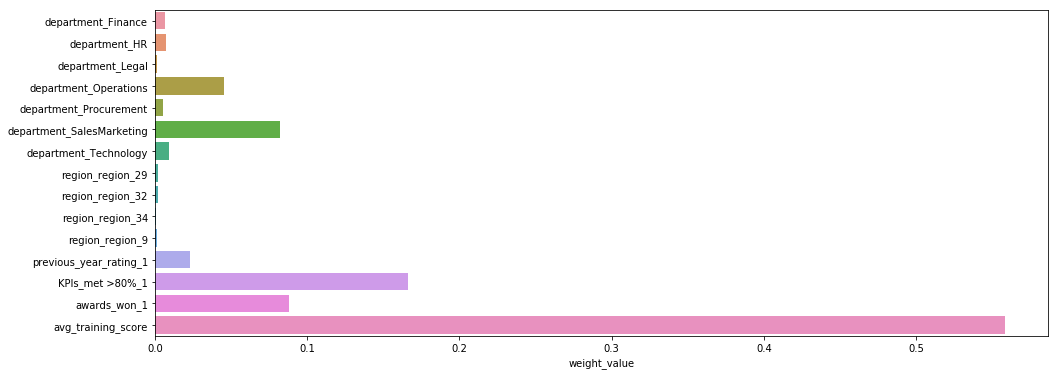

In [67]:
import seaborn as sns
plt.figure(figsize=(16,6))
sns.barplot(data=feature_importances,y=feature_importances.index,x=feature_importances['weight_value'])

#### Analyzing interaction terms

In [72]:
x_data4=x_data3.copy()

In [92]:
x_data4['training-kpi']=x_data4['avg_training_score']*x_data4['KPIs_met >80%_1']
x_data4['training-sales']=x_data4['avg_training_score']*x_data4['department_SalesMarketing']
x_data4['training-operations']=x_data4['avg_training_score']*x_data4['department_Operations']
x_data4.head()

,department_Finance,department_HR,department_Legal,department_Operations,department_Procurement,department_SalesMarketing,department_Technology,region_region_29,region_region_32,region_region_34,region_region_9,previous_year_rating_1,KPIs_met >80%_1,awards_won_1,avg_training_score,training-kpi,training-sales,training-award,training-operations
employee_id,,,,,,,,,,,,,,,,,,,
65438,0,0,0,0,0,1,0,0,0,0,0,0,1,0,-1.075922,-1.075922,-1.075922,-0.0,-0.00000
65141,0,0,0,1,0,0,0,0,0,0,0,0,0,0,-0.253280,-0.000000,-0.000000,-0.0,-0.25328
7513,0,0,0,0,0,1,0,0,0,0,0,0,0,0,-1.001136,-0.000000,-1.001136,-0.0,-0.00000
2542,0,0,0,0,0,1,0,0,0,0,0,1,0,0,-1.001136,-0.000000,-1.001136,-0.0,-0.00000
48945,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0.718933,0.000000,0.000000,0.0,0.00000


In [104]:
from imblearn.over_sampling import SMOTE
sm=SMOTE(random_state=99)

In [105]:
def model_sm(clf,X_train,Y_train):
    x_train, x_test, y_train, y_test = train_test_split(X_train, Y_train, test_size=0.20, stratify = Y_train, random_state = 99)
    x_train_final,y_train_final=sm.fit_sample(x_train,y_train)
    clf.fit(x_train_final,y_train_final)
    y_pred = clf.predict(x_test)
    print('Scores of the Model')
    print('Confusion Matrix of the model:')
    print(confusion_matrix(y_test,y_pred))
    print('-----------------------------------------')
    print('Accuracy Score:',accuracy_score(y_test,y_pred))
    print('-----------------------------------------')
    print('Classification report:')
    print(classification_report(y_test, y_pred))
    print('------------------------------------------')
    print('f1 score:',f1_score(y_test,y_pred))
    print('------------------------------------------')
    print('ROC AUC score:',roc_auc_score(y_test,y_pred))
    print('------------------------------------------')
    print('')
    print('Cross Validation using KFold:')
    kf = KFold(n_splits=5,random_state=99)
    print('Accuracy score using KFold cross validation:')
    score = cross_val_score(clf, X_train, Y_train, cv=kf,scoring='f1', n_jobs=1)
    for i in score:
        print('cross_val_score:',i)
    print('Mean Acuuracy Score:',score.mean())

In [106]:
model_sm(lr_final,x_data4,y_data)

Scores of the Model
Confusion Matrix of the model:
[[7218 2810]
 [ 136  798]]
-----------------------------------------
Accuracy Score: 0.7312534209085934
-----------------------------------------
Classification report:
              precision    recall  f1-score   support

           0       0.98      0.72      0.83     10028
           1       0.22      0.85      0.35       934

   micro avg       0.73      0.73      0.73     10962
   macro avg       0.60      0.79      0.59     10962
weighted avg       0.92      0.73      0.79     10962

------------------------------------------
f1 score: 0.35138705416116245
------------------------------------------
ROC AUC score: 0.7870871623693487
------------------------------------------

Cross Validation using KFold:
Accuracy score using KFold cross validation:
cross_val_score: 0.41518202943454685
cross_val_score: 0.4114583333333333
cross_val_score: 0.40556009811937854
cross_val_score: 0.42171518489378446
cross_val_score: 0.3977455716586151
M

In [107]:
RF=RandomForestClassifier()
model_sm(RF,x_data4,y_data)

Scores of the Model
Confusion Matrix of the model:
[[7303 2725]
 [ 111  823]]
-----------------------------------------
Accuracy Score: 0.7412880861156723
-----------------------------------------
Classification report:
              precision    recall  f1-score   support

           0       0.99      0.73      0.84     10028
           1       0.23      0.88      0.37       934

   micro avg       0.74      0.74      0.74     10962
   macro avg       0.61      0.80      0.60     10962
weighted avg       0.92      0.74      0.80     10962

------------------------------------------
f1 score: 0.36724676483712626
------------------------------------------
ROC AUC score: 0.8047085932408529
------------------------------------------

Cross Validation using KFold:
Accuracy score using KFold cross validation:
cross_val_score: 0.4988929889298893
cross_val_score: 0.49235993208828527
cross_val_score: 0.49883810999225403
cross_val_score: 0.5244913338357197
cross_val_score: 0.49465648854961836
M

In [108]:
RF.feature_importances_

array([0.01401391, 0.00570322, 0.00346742, 0.01402312, 0.02695655,
       0.03722836, 0.00903296, 0.00754895, 0.00686852, 0.00270324,
       0.00341826, 0.04287539, 0.11324307, 0.03198056, 0.28072688,
       0.19563658, 0.09442474, 0.02754016, 0.08260811])

In [109]:
feature_importances = pd.DataFrame(RF.feature_importances_,
                                   index = x_data4.columns)
feature_importances.columns=['weight_value']
feature_importances

,weight_value
department_Finance,0.014014
department_HR,0.005703
department_Legal,0.003467
department_Operations,0.014023
department_Procurement,0.026957
department_SalesMarketing,0.037228
department_Technology,0.009033
region_region_29,0.007549
region_region_32,0.006869
region_region_34,0.002703


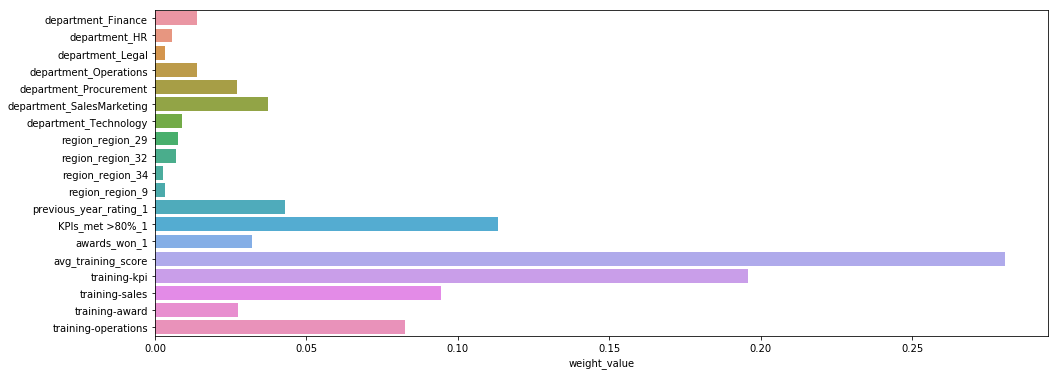

In [110]:
plt.figure(figsize=(16,6))
sns.barplot(data=feature_importances,y=feature_importances.index,x=feature_importances['weight_value'])

In [118]:
os = SMOTE(sampling_strategy='minority',random_state=99,ratio=0.4)
columns = x_data4.columns
os_data_x,os_data_y=os.fit_sample(x_data4, y_data)

os_data_x = pd.DataFrame(data=os_data_x,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['y'])
# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_x))
print("Number of not promoted in oversampled data",len(os_data_y[os_data_y['y']==0]))
print("Number of promoted",len(os_data_y[os_data_y['y']==1]))
print("Proportion of not promoted data in oversampled data is ",len(os_data_y[os_data_y['y']==0])/len(os_data_x))
print("Proportion of promoted data in oversampled data is ",len(os_data_y[os_data_y['y']==1])/len(os_data_x))

length of oversampled data is  70196
Number of not promoted in oversampled data 50140
Number of promoted 20056
Proportion of not promoted data in oversampled data is  0.7142857142857143
Proportion of promoted data in oversampled data is  0.2857142857142857


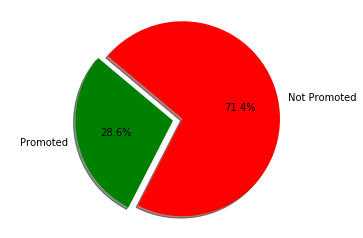

In [119]:
labels = 'Promoted', 'Not Promoted'
sizes = [os_data_y['y'].sum(), len(os_data_y)-os_data_y['y'].sum()]
colors = ['green', 'red']
explode = (0.1, 0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()

In [172]:
lr=LogisticRegression(C=1000000,class_weight={0: 0.24, 1: 0.76})
model(lr,os_data_x,os_data_y)

Scores of the Model
Confusion Matrix of the model:
[[6921 3108]
 [ 431 3580]]
-----------------------------------------
Accuracy Score: 0.7479344729344729
-----------------------------------------
Classification report:
              precision    recall  f1-score   support

           0       0.94      0.69      0.80     10029
           1       0.54      0.89      0.67      4011

   micro avg       0.75      0.75      0.75     14040
   macro avg       0.74      0.79      0.73     14040
weighted avg       0.83      0.75      0.76     14040

------------------------------------------
f1 score: 0.6692214225628564
------------------------------------------
ROC AUC score: 0.7913221068027626
------------------------------------------

Cross Validation using KFold:
Accuracy score using KFold cross validation:
cross_val_score: 0.6760856977417488
cross_val_score: 0.677623855365109
cross_val_score: 0.6807412620220501
cross_val_score: 0.6702475478748249
cross_val_score: 0.6706302021403091
Mean A

In [171]:
weights = np.linspace(0.05, 0.95, 20)
tuned_parameters = {'class_weight':  [{0: x, 1: 1.0-x} for x in weights]}

model_lr = GridSearchCV(LogisticRegression(), tuned_parameters, scoring = 'f1', cv=5)
model_lr.fit(os_data_x,os_data_y)

print(model_lr.best_estimator_)
print(model_lr.score(os_data_x,os_data_y))

LogisticRegression(C=1.0,
          class_weight={0: 0.23947368421052628, 1: 0.7605263157894737},
          dual=False, fit_intercept=True, intercept_scaling=1,
          max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
          random_state=None, solver='warn', tol=0.0001, verbose=0,
          warm_start=False)
0.6740812379110253


In [173]:
from xgboost import XGBClassifier
xg=XGBClassifier()

Scores of the Model
Confusion Matrix of the model:
[[9867  162]
 [2445 1566]]
-----------------------------------------
Accuracy Score: 0.8143162393162393
-----------------------------------------
Classification report:
              precision    recall  f1-score   support

           0       0.80      0.98      0.88     10029
           1       0.91      0.39      0.55      4011

   micro avg       0.81      0.81      0.81     14040
   macro avg       0.85      0.69      0.71     14040
weighted avg       0.83      0.81      0.79     14040

------------------------------------------
f1 score: 0.545739675901725
------------------------------------------
ROC AUC score: 0.6871365858755308
------------------------------------------

Cross Validation using KFold:
Accuracy score using KFold cross validation:
cross_val_score: 0.535248041775457
cross_val_score: 0.5288632326820604
cross_val_score: 0.5290294627383016
cross_val_score: 0.5304232804232805
cross_val_score: 0.5384271671134941
Mean Ac

In [174]:
xtrain,xtest,ytrain,ytest=train_test_split(os_data_x,os_data_y,test_size=0.3,random_state=99)

In [175]:
lr=LogisticRegression(C=100000,class_weight={0: 0.24, 1: 0.76})
lr.fit(xtrain,ytrain)

LogisticRegression(C=100000, class_weight={0: 0.24, 1: 0.76}, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)

In [176]:
pred_log=lr.predict_proba(xtest)

In [178]:
a=pd.DataFrame(pred_log)
a

,0,1
0,0.871462,0.128538
1,0.186037,0.813963
2,0.733568,0.266432
3,0.987101,0.012899
4,0.583030,0.416970
5,0.388989,0.611011
6,0.209112,0.790888
7,0.109860,0.890140
8,0.889139,0.110861
9,0.871462,0.128538


In [179]:
y_pred=a.iloc[:,[1]]
y_pred.head()

,1
0,0.128538
1,0.813963
2,0.266432
3,0.012899
4,0.416970


In [181]:
y_test_df = pd.DataFrame(ytest)
y_test_df.head()

,y
22594,0
66910,1
49071,0
14337,0
1184,0


In [185]:
y_test_df.reset_index(drop=True, inplace=True)

In [187]:
y_test_df.head()

,y
0,0
1,1
2,0
3,0
4,0


In [192]:
y_pred_final = pd.concat([y_test_df,y_pred],axis=1)
y_pred_final= y_pred_final.rename(columns={ 1 : 'Promotion_probability'})
y_pred_final.head()

,y,Promotion_probability
0,0,0.128538
1,1,0.813963
2,0,0.266432
3,0,0.012899
4,0,0.416970


In [193]:
y_pred_final['predicted'] = y_pred_final.Promotion_probability.map( lambda x: 1 if x > 0.5 else 0)
y_pred_final

,y,Promotion_probability,predicted
0,0,0.128538,0
1,1,0.813963,1
2,0,0.266432,0
3,0,0.012899,0
4,0,0.416970,0
5,0,0.611011,1
6,1,0.790888,1
7,1,0.890140,1
8,0,0.110861,0
9,0,0.128538,0


In [196]:
confusion =confusion_matrix(y_pred_final['y'],y_pred_final['predicted'])
confusion

array([[10621,  4418],
       [  645,  5375]], dtype=int64)

In [223]:
f1_score(y_pred_final['y'],y_pred_final['predicted'])

0.6798204009359389

In [197]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[1,0] # false positives
FN = confusion[0,1] # false negatives

In [198]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.5488614316348412

In [199]:
# Let us calculate specificity
TN / float(TN+FP)

0.9427480916030534

In [200]:
# positive predictive value 
print (TP / float(TP+FP))

0.8928571428571429


In [201]:
# Negative predictive value
print (TN / float(TN+ FN))

0.7062304674512933


In [202]:
from sklearn import metrics
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 4))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds

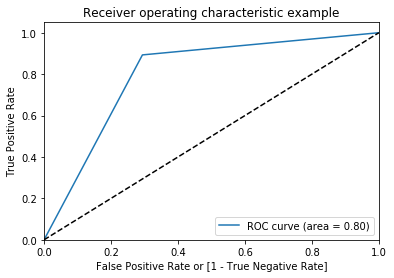

(array([0.        , 0.29376953, 1.        ]),
 array([0.        , 0.89285714, 1.        ]),
 array([2, 1, 0], dtype=int64))

In [203]:
draw_roc(y_pred_final.y, y_pred_final.predicted)

In [204]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_pred_final[i]= y_pred_final.Promotion_probability.map( lambda x: 1 if x > i else 0)
y_pred_final.head()

,y,Promotion_probability,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.128538,0,1,1,0,0,0,0,0,0,0,0
1,1,0.813963,1,1,1,1,1,1,1,1,1,1,0
2,0,0.266432,0,1,1,1,0,0,0,0,0,0,0
3,0,0.012899,0,1,0,0,0,0,0,0,0,0,0
4,0,0.416970,0,1,1,1,1,1,0,0,0,0,0


In [279]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['probability','f1','precision','recall'])
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix( y_pred_final.y, y_pred_final[i] )
    total1=sum(sum(cm1))
    f1=f1_score(y_pred_final.y, y_pred_final[i])
    preci=precision_score(y_pred_final.y, y_pred_final[i])
    recall=recall_score(y_pred_final.y, y_pred_final[i])
    cutoff_df.loc[i] =[ i ,f1,preci,recall]
print(cutoff_df)

     probability        f1  precision    recall
0.0          0.0  0.444625   0.285864  1.000000
0.1          0.1  0.588943   0.417406  0.999834
0.2          0.2  0.633841   0.465658  0.992193
0.3          0.3  0.659342   0.497589  0.976910
0.4          0.4  0.667764   0.516790  0.943355
0.5          0.5  0.679820   0.548861  0.892857
0.6          0.6  0.661873   0.566844  0.795183
0.7          0.7  0.630564   0.610644  0.651827
0.8          0.8  0.557377   0.720074  0.454651
0.9          0.9  0.441700   0.861272  0.297010


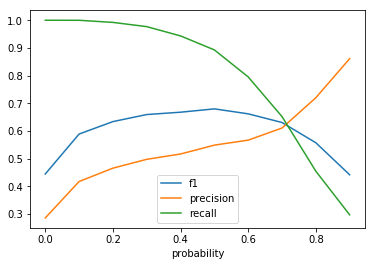

In [280]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='probability', y=['f1','precision','recall'])

In [281]:
y_pred_final['final_predicted'] = y_pred_final.Promotion_probability.map( lambda x: 1 if x > 0.7 else 0)
y_pred_final.head()

,y,Promotion_probability,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.128538,0,1,1,0,0,0,0,0,0,0,0,0
1,1,0.813963,1,1,1,1,1,1,1,1,1,1,0,1
2,0,0.266432,0,1,1,1,0,0,0,0,0,0,0,0
3,0,0.012899,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0.416970,0,1,1,1,1,1,0,0,0,0,0,0


In [282]:
confusion_matrix(y_pred_final['y'],y_pred_final['final_predicted'])

array([[12537,  2502],
       [ 2096,  3924]], dtype=int64)

In [283]:
f1_score(y_pred_final['y'],y_pred_final['final_predicted'])

0.6305640366382774